# Tutorial

In this tutorial, we will explore how to use SWAMP-E to simulate planetary atmospheres. 

In [1]:
import numpy

In [2]:
%pip install -i https://test.pypi.org/simple/ SWAMPE==0.0.48

Looking in indexes: https://test.pypi.org/simple/Note: you may need to restart the kernel to use updated packages.



In [3]:
import SWAMPE


Bad key text.latex.preview in file c:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95 

First, let's specify some key physical inputs:


In [4]:
# planetary radius a in meters

a=8.2*10**(7) 

# planetary rotation rate omega in radians/s

omega=3.2*10**(-5)

# the reference geopotential height, m^2/s^2

Phibar=4*(10**6)

Now let's specify the timestep and the number of timesteps. For stability, a reasonable timestep will range from 30 to 180 seconds, with strongly forced planets needing a shorter timestep.

In [5]:
#timestep length in seconds

dt=30

#number of timesteps for the simulation

tmax=10

We will also specify the spectral resolution M. This resolution determines the size of the resulting lat-lon grid. 

In [6]:
M=42

Let's specify forcing parameters. The forcing strength is controlled via DPhieq. ## explain what DPhiEq is

We will need timescales radiative timescale of one day and a drag timescale of ten days:

In [7]:
taurad=3600*24
taudrag=10*3600*24
DPhieq=Phibar


Now, we can use SWAMP-E to run the simulation. 
We can specify whether we want to see plots as the simulation is conducted and control the frequency of output using plotflag and plotfreq.


In [8]:
plotflag=True
plotfreq=5 #output plots every 5 time steps

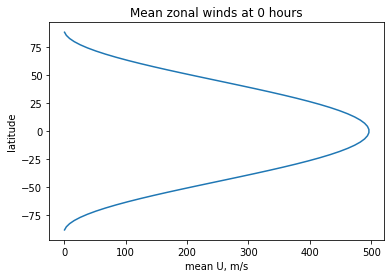

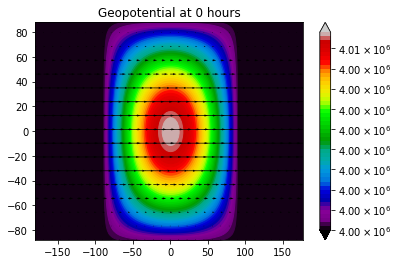

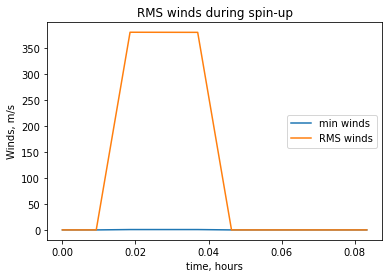

In [9]:
SWAMPE.run_model(M,dt,tmax,Phibar, omega, a,  taurad=taurad, taudrag=taudrag, DPhieq=Phibar, plotflag=plotflag, plotfreq=plotfreq,saveflag=False,verbose=False)



Note that a 2D model like SWAMP-E will need a few hundred time steps to spin up, so with a real-world example, we recommend running the model using a script rather than a Jupyter notebook. Here are sample outputs for the same planetary parameters, but without drag (equivalent to $\tau_{\rm drag}=\infty$) and with $\tau_{\rm rad}$ equal to 0.1, 1, and 10 Earth days.

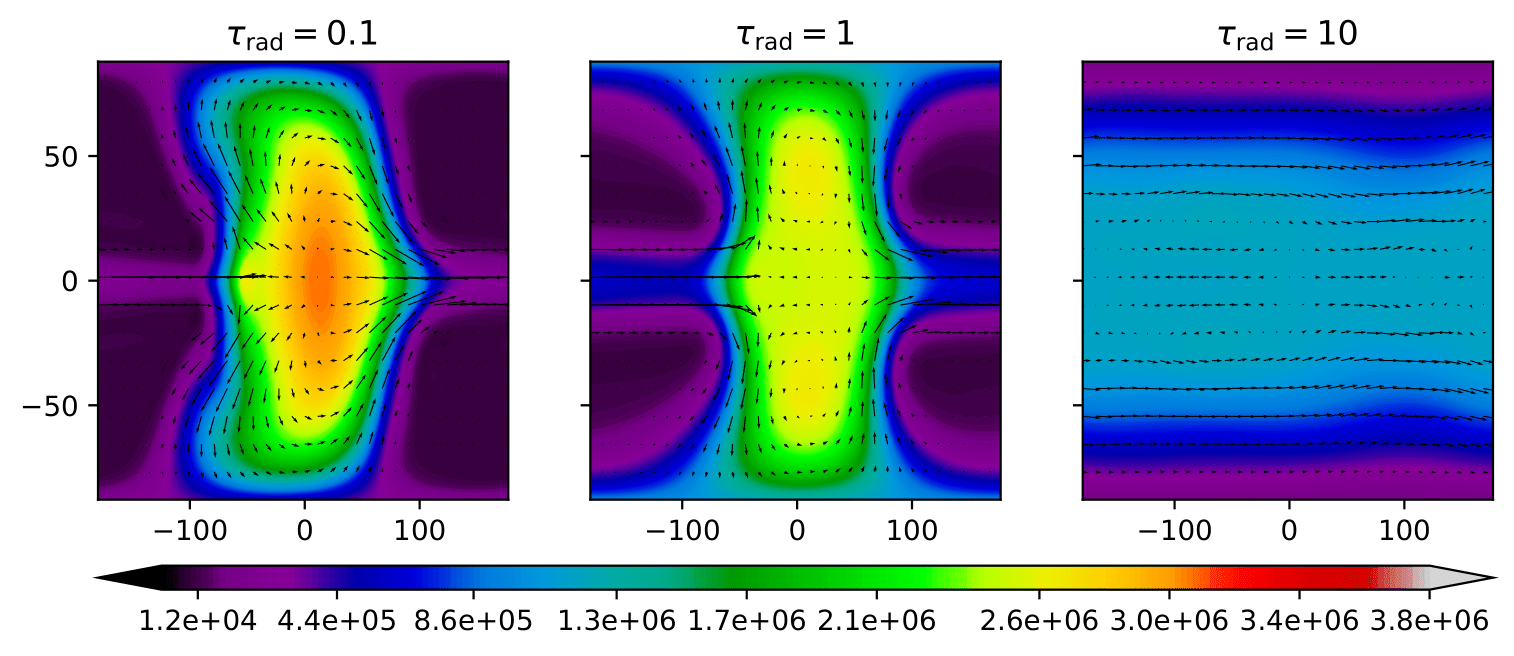

## Saving the data

Since the simulations can take a few hundred timeteps to spin up, it is helpful to save the data to be loaded later. We can specify whether to save the data using saveflag. We can also specify savefrequency. The data will be stored in the pickle format with the name 'variable-timestamp', where timestamp can be specified in seconds, minutes, or hours. 

The saved data files will look like this:
```
Phi-10
eta-10
delta-10
U-10
V-10
```

This will save the data every 120 time steps in the folder C:/your/Path/here/ 
```
SWAMPE.run_model(..., saveflag=True, savefreq=120, custompath='C:/your/Path/here/',timeunits='minutes')

```
For a timestep of 30 seconds, the first output will look like this, with the timestamp of sixty minutes:
```
Phi-60
eta-60
delta-60
U-60
V-60
```


If no custom path is provided, SWAMPE will create a local 'data/' directory and store the data there.

### Continuation

We can also start the simulation from any suitable initial condition. Let's save some data and restart the simulation from the saved data.

In [17]:
#saving the data every 5 timesteps
SWAMPE.run_model(M,dt,tmax,Phibar, omega, a,  taurad=taurad, taudrag=-1, DPhieq=Phibar, plotflag=False, plotfreq=plotfreq,saveflag=True,savefreq=5,verbose=False,timeunits='seconds')

Now we can load the saved data. Let's say we want to load the data from 150 seconds.

In [18]:
timestamp='150'
eta, delta, Phi, U, V =SWAMPE.continuation.load_data(str(timestamp))


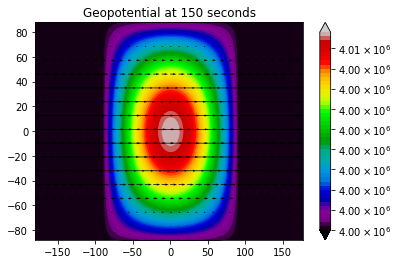

In [19]:
N,I,J,otherdt,lambdas,mus,w=SWAMPE.initial_conditions.spectral_params(M)
fig=SWAMPE.plotting.quiver_geopot_plot(U,V,Phi+4*10**6,lambdas,mus,timestamp,sparseness=4,minlevel=None,maxlevel=None,units='seconds')

t=10, 9.900990099009901% complete
t=20, 19.801980198019802% complete
t=30, 29.702970297029704% complete
t=40, 39.603960396039604% complete
t=50, 49.504950495049506% complete


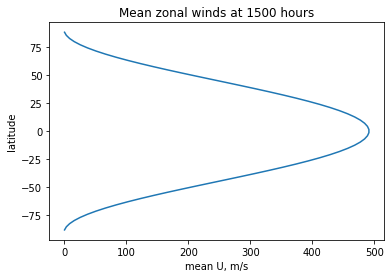

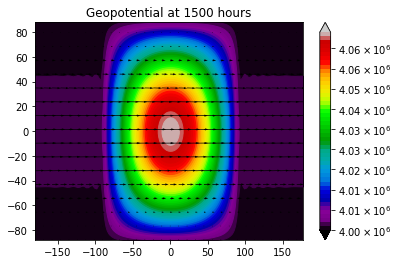

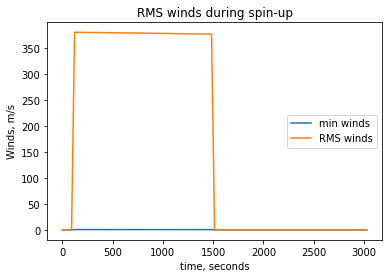

t=60, 59.40594059405941% complete
t=70, 69.3069306930693% complete
t=80, 79.20792079207921% complete
t=90, 89.10891089108911% complete
t=100, 99.00990099009901% complete


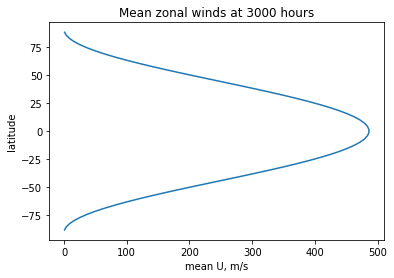

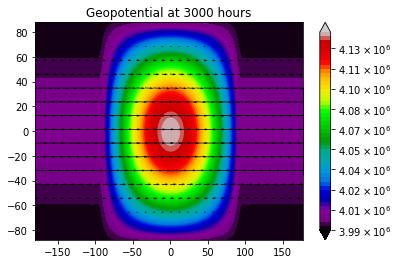

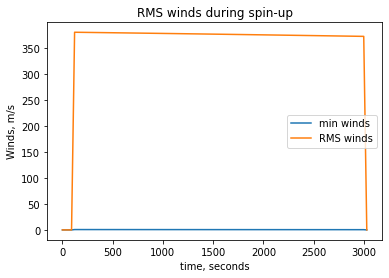

GCM run completed!


In [37]:
SWAMPE.run_model(M,30,101,Phibar, omega, a,  taurad=taurad, taudrag=-1, DPhieq=Phibar, plotflag=True, plotfreq=50,saveflag=False,verbose=True,timeunits='seconds',contflag=True,contTime=150)

5
